File 'customer_purchase_history.csv' not found. Generating synthetic dataset...
   Feature1  Feature2  Feature3
0  0.681500  0.883863  0.220234
1  0.350460  0.123508  0.843196
2  0.753310  0.691799  0.796167
3  0.446993  0.472044  0.865561
4  0.279680  0.727619  0.585263


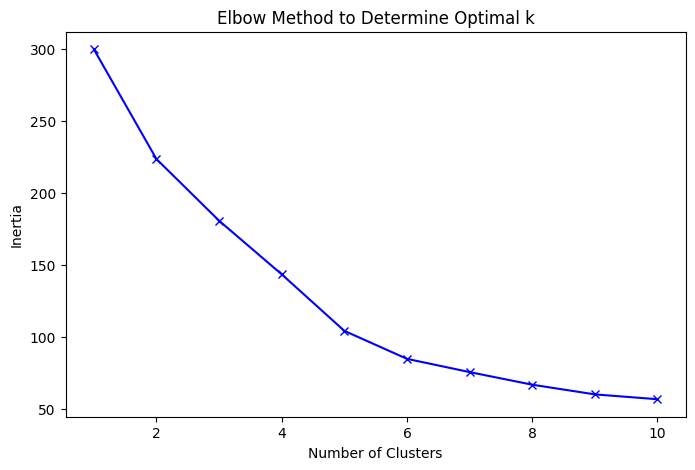

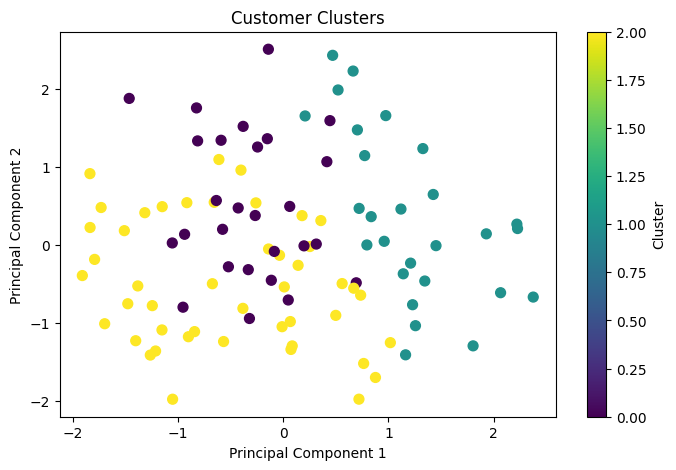

Clustering complete. Results saved to 'clustered_customers.csv'.


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

# Check if the file exists
file_path = 'customer_purchase_history.csv'
if not os.path.exists(file_path):
    # Create a synthetic dataset if file does not exist
    print(f"File '{file_path}' not found. Generating synthetic dataset...")
    data = pd.DataFrame({
        'Feature1': np.random.rand(100),
        'Feature2': np.random.rand(100),
        'Feature3': np.random.rand(100)
    })
else:
    # Load the customer purchase history data
    data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Assume the dataset contains numerical features for purchase history
# Preprocess the data by scaling it
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# From the elbow plot, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Save the clustered data to a new CSV file
data.to_csv('clustered_customers.csv', index=False)

# Visualize the clusters (if the data has 2 principal components or dimensions)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clusters')
plt.colorbar(label='Cluster')
plt.show()

print("Clustering complete. Results saved to 'clustered_customers.csv'.")
